In [1]:
import tensorflow.keras as keras
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
%matplotlib inline

model_from_json = keras.models.model_from_json

types = ['kmno4', 'set1', 'set2', 'set5', 'set9']

Sequential=keras.models.Sequential
Dense=keras.layers.Dense
np.random.seed(7)

In [7]:
dataset = loadmat('Final_data/data.mat')
X = dataset['train'][:,:16]
Y = dataset['train'][:,16]

In [8]:
X_val = dataset['val'][:,:16]
Y_val = dataset['val'][:,16]

In [5]:
model = Sequential()
model.add(Dense(24, input_dim=16, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [6]:
# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
# Fit the model
model.fit(X, Y, epochs=5)

Epoch 1/5
3541972/3541972 [==============================] - 395s 112us/step - loss: 0.7174 - acc: 0.6614
Epoch 2/5
3541972/3541972 [==============================] - 394s 111us/step - loss: 0.6241 - acc: 0.7052
Epoch 3/5
3541972/3541972 [==============================] - 394s 111us/step - loss: 0.6012 - acc: 0.7152
Epoch 4/5
3541972/3541972 [==============================] - 393s 111us/step - loss: 0.5898 - acc: 0.7203
Epoch 5/5
3541972/3541972 [==============================] - 393s 111us/step - loss: 0.5836 - acc: 0.7226


In [8]:
# evaluate the model
scores = model.evaluate(X_val, Y_val)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

758994/758994 [==============================] - 17s 22us/step

acc: 71.79%


In [9]:
scores

[0.5897582195083315, 0.7179029083237001]

In [10]:
# serialize model to JSON
model_json = model.to_json()
with open("models/model1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("models/model1.h5")

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 125       
Total params: 2,333
Trainable params: 2,333
Non-trainable params: 0
_________________________________________________________________


In [15]:
%%file models/model1.txt
acc = 71.79 loss 58.97
trained on 3541972 data 5 epochs

Overwriting models/model1.txt


How to load:

# Check some predictions to see what goes wrong

In [10]:
json_file = open('models/model1.json', 'r')
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights('models/model1.h5')
# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Check if model is alright.

In [11]:
# evaluate the model
scores = model.evaluate(X_val, Y_val)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

758994/758994 [==============================] - 17s 23us/step

acc: 71.79%


In [21]:
for chemtype in range(5):
    print('\nSolution type: {}'.format(types[chemtype]))
    mask = (Y_val==chemtype)
    m_Y_val = Y_val[mask]
    m_X_val = X_val[mask]
    # evaluate the model
    scores = model.evaluate(m_X_val, m_Y_val)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


Solution type: kmno4
161041/161041 [==============================] - 4s 23us/step
acc: 63.48%

Solution type: set1
205321/205321 [==============================] - 5s 22us/step
acc: 65.05%

Solution type: set2
77615/77615 [==============================] - 2s 22us/step
acc: 91.13%

Solution type: set5
213843/213843 [==============================] - 5s 22us/step
acc: 69.61%

Solution type: set9
101174/101174 [==============================] - 2s 22us/step
acc: 88.48%



Solution type: kmno4

Solution type: set1

Solution type: set2

Solution type: set5

Solution type: set9


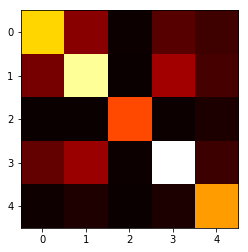

In [42]:
conf_mat = np.zeros((5,5))
for chemtype in range(5):
    print('\nSolution type: {}'.format(types[chemtype]))
    mask = (Y_val==chemtype)
    m_Y_val = Y_val[mask]
    m_X_val = X_val[mask]
    n = np.sum(mask)
    # evaluate the model
    preds = np.argmax(model.predict(m_X_val),axis=1)
    unique, counts = np.unique(preds, return_counts=True)
    d = dict(zip(unique, counts))
    for chemtype2 in range(5):
        conf_mat[chemtype,chemtype2]=d[chemtype2]
plt.imshow(conf_mat,cmap='hot')

In [45]:
row_sums = conf_mat.sum(axis=1)
normalized_conf_mat = conf_mat / row_sums[:, np.newaxis]

In [53]:
print((normalized_conf_mat*10000).astype(int))

[[6347 1777   53 1072  750]
 [1169 6505    8 1653  663]
 [  88   79 9113  102  616]
 [ 937 1526   40 6960  534]
 [ 161  480   38  471 8847]]


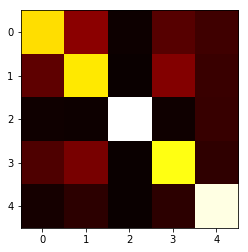

In [4]:
plt.imshow(np.array(
[[6347,1777  , 53, 1072,  750],
 [1169, 6505,    8, 1653,  663,],
 [  88,   79, 9113,  102,  616,],
 [ 937, 1526,   40, 6960,  534,],
 [ 161,  480,   38,  471, 8847]]), cmap='hot')